<a href="https://colab.research.google.com/github/Quinn-Caton/UMKC_DataScience/blob/main/Caton_HW1_5530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# /content/drive/MyDrive/UMKC_Fa24/datasets/[filename] <- to import dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning

## 1. Load mpg_left

In [46]:
# import mpg left, print info

df_left = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/mpg_left.csv')
df_left.info()
df_left.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           403 non-null    float64
 1   cylinders     403 non-null    float64
 2   horsepower    397 non-null    float64
 3   acceleration  404 non-null    float64
 4   name          406 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


,mpg,cylinders,horsepower,acceleration,name
0,18.0,8.0,130.0,12.0,chevrolet chevelle malibu
1,18.0,8.0,130.0,12.0,chevrolet chevelle malibu
2,15.0,8.0,165.0,11.5,buick skylark 320
3,18.0,8.0,150.0,11.0,plymouth satellite
4,16.0,8.0,150.0,12.0,amc rebel sst


In [47]:
# identify duplicates, remove, and read info again

print(df_left.duplicated().sum())
df_left.drop_duplicates(inplace=True)
df_left.info()

9
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 405
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           394 non-null    float64
 1   cylinders     394 non-null    float64
 2   horsepower    388 non-null    float64
 3   acceleration  395 non-null    float64
 4   name          397 non-null    object 
dtypes: float64(4), object(1)
memory usage: 18.6+ KB


In [48]:
# remove samples with null values

df_left.dropna(inplace=True)
df_left.shape

(383, 5)

## 2. Load mpg_right

In [49]:
# read into dataframe, print info

df_right = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/mpg_right.csv')
df_right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  399 non-null    float64
 1   weight        399 non-null    float64
 2   model_year    399 non-null    float64
 3   origin        403 non-null    object 
 4   name          403 non-null    object 
dtypes: float64(3), object(2)
memory usage: 15.9+ KB


In [50]:
# remove duplicates

df_right.drop_duplicates(inplace=True)
df_right.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  394 non-null    float64
 1   weight        394 non-null    float64
 2   model_year    394 non-null    float64
 3   origin        398 non-null    object 
 4   name          398 non-null    object 
dtypes: float64(3), object(2)
memory usage: 18.7+ KB


In [51]:
# identify rows with null values and impute the mean
'''
df_auto['MPG'] = df_auto['MPG'].fillna(df_auto['MPG'].mean())
df_auto['MPG'].isnull().sum()
df_auto['MPG'].head(5)
'''

df_right['displacement'] = df_right['displacement'].fillna(df_right['displacement'].mean())
df_right['displacement'].isnull().sum()

df_right['weight'] = df_right['weight'].fillna(df_right['weight'].mean())
df_right['weight'].isnull().sum()

df_right['model_year'] = df_right['model_year'].fillna(df_right['model_year'].mean())
df_right['model_year'].isnull().sum()

df_right.shape

(398, 5)

# Enriching Data

## 1. Join Dataframes

In [52]:
# merging the dataframes (inner merge)

df_merged = pd.merge(df_left, df_right, how='inner')
df_merged.head(5)
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           667 non-null    float64
 1   cylinders     667 non-null    float64
 2   horsepower    667 non-null    float64
 3   acceleration  667 non-null    float64
 4   name          667 non-null    object 
 5   displacement  667 non-null    float64
 6   weight        667 non-null    float64
 7   model_year    667 non-null    float64
 8   origin        667 non-null    object 
dtypes: float64(7), object(2)
memory usage: 47.0+ KB
0


In [53]:
# dropping duplicates and null values
df_merged.drop_duplicates(inplace=True)
df_merged.dropna(inplace=True)

df_merged.info()
df_merged.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           667 non-null    float64
 1   cylinders     667 non-null    float64
 2   horsepower    667 non-null    float64
 3   acceleration  667 non-null    float64
 4   name          667 non-null    object 
 5   displacement  667 non-null    float64
 6   weight        667 non-null    float64
 7   model_year    667 non-null    float64
 8   origin        667 non-null    object 
dtypes: float64(7), object(2)
memory usage: 47.0+ KB


(667, 9)

# Data Manipulation

## 1. Analysis by Origin

In [54]:
df_merged.head(5)

,mpg,cylinders,horsepower,acceleration,name,displacement,weight,model_year,origin
0,18.0,8.0,130.0,12.0,chevrolet chevelle malibu,307.0,3504.0,70.0,usa
1,18.0,8.0,130.0,12.0,chevrolet chevelle malibu,250.0,3329.0,71.0,usa
2,17.0,6.0,100.0,15.5,chevrolet chevelle malibu,307.0,3504.0,70.0,usa
3,17.0,6.0,100.0,15.5,chevrolet chevelle malibu,250.0,3329.0,71.0,usa
4,15.0,8.0,165.0,11.5,buick skylark 320,350.0,3693.0,70.0,usa


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

,count
origin,
usa,434
japan,135
europe,98


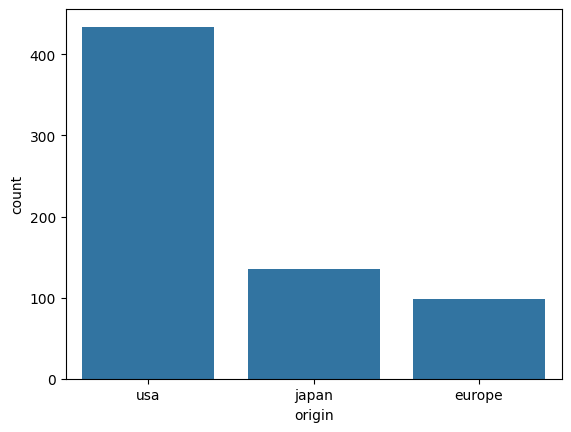

In [72]:
# Determine vehicle count per origin

sns.countplot(x='origin', data=df_merged)
df_merged['origin'].value_counts()

In [78]:
# Average MPG for each region

df_merged.groupby('origin')['mpg'].mean().reset_index()

,origin,mpg
0,europe,27.033673
1,japan,30.322963
2,usa,19.822811


In [79]:
# Finding lowest avg. weight per origin

df_merged.groupby('origin')['weight'].mean().reset_index()

,origin,weight
0,europe,2457.408163
1,japan,2229.844990
2,usa,3301.671185


# Structuring Data

## Data transformation

In [80]:
df_dropped = df_merged.drop(['name', 'origin'], axis=1)
df_dropped.head(5)

,mpg,cylinders,horsepower,acceleration,displacement,weight,model_year
0,18.0,8.0,130.0,12.0,307.0,3504.0,70.0
1,18.0,8.0,130.0,12.0,250.0,3329.0,71.0
2,17.0,6.0,100.0,15.5,307.0,3504.0,70.0
3,17.0,6.0,100.0,15.5,250.0,3329.0,71.0
4,15.0,8.0,165.0,11.5,350.0,3693.0,70.0


In [82]:
from sklearn import preprocessing

In [86]:
# standardizing the data

df_standardized = preprocessing.scale(df_dropped)
df_standardized = pd.DataFrame(df_standardized, columns=df_dropped.columns)
df_standardized.head(5)

,mpg,cylinders,horsepower,acceleration,displacement,weight,model_year
0,-0.680616,1.527174,0.714537,-1.311944,1.108492,0.663674,-1.605126
1,-0.680616,1.527174,0.714537,-1.311944,0.548489,0.449905,-1.318726
2,-0.816535,0.321701,-0.084495,-0.027025,1.108492,0.663674,-1.605126
3,-0.816535,0.321701,-0.084495,-0.027025,0.548489,0.449905,-1.318726
4,-1.088374,1.527174,1.646740,-1.495504,1.530950,0.894545,-1.605126


In [87]:
# normalizing the data

df_normalized = preprocessing.MinMaxScaler().fit_transform(df_dropped)
df_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
df_normalized.head(5)

,mpg,cylinders,horsepower,acceleration,displacement,weight,model_year
0,0.239362,1.0,0.456522,0.238095,0.617571,0.536150,0.000000
1,0.239362,1.0,0.456522,0.238095,0.470284,0.486532,0.083333
2,0.212766,0.6,0.293478,0.446429,0.617571,0.536150,0.000000
3,0.212766,0.6,0.293478,0.446429,0.470284,0.486532,0.083333
4,0.159574,1.0,0.646739,0.208333,0.728682,0.589736,0.000000
